In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import logging
from numpy import convolve
from matplotlib.gridspec import GridSpec
import math as m
import pandas as pd
import glob
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fredda_index=["sn", "sampno", "tstart", "boxcar", "idt", "dm", "beamno",
            "mjd", "sampno_start", "sampno_end", "idt_start", "idt_end", 
              "ncands", "width", "real_sn_avg",'real_dm']
hmd_index=["sn", "sampno", "tstart", "boxcar", "idt", "dm", "ncands",
            "sampno_start", "sampno_end", "width", "real_sn_avg",'real_dm']
sn_index=["dm",'width','fwhm','flux','quadsum']

In [2]:
# nsamp=50
# tsamp=1
# time=np.arange(nsamp)*tsamp
# bins=10
# matrix=np.ones((nsamp,bins))*np.linspace(-0.5,0.5,bins)*tsamp
# timematrix=(np.ones((nsamp,bins)).T*time).T
# finergrid=(matrix+timematrix).flatten()
# t0=25
# def gaus_func(t,t0,sigi):
#     #ti=0### gaussian function
#     sit=1/np.sqrt(np.pi*2*(sigi**2))*np.exp(-(t-t0)**2/2/(sigi**2)) ### model 0 in ravi 2018

#     ### normalisation factor is 1/np.sqrt(np.pi*2*(sigi**2)) replace A with this term for a total of 1 pdf
#     return sit

In [3]:
#### reads 
sim=pd.read_csv("standard dataset pipeline output/hifreq/hifreq_single.txt",delimiter=";",names=sn_index)
nbin=100
averagestandard=sim.groupby(['dm',"width"]).mean()
averagestandard.quadsum.values

array([ 0.02803949, -0.04000961, -0.00668999,  0.0090034 ,  0.02351344,
        0.00189333, -0.01164905, -0.01933903,  0.01999578,  0.0473647 ,
        0.07082786, -0.03761437,  0.00895642, -0.04400092,  0.03781549,
        0.0286086 ,  0.03963804, -0.00929575,  0.00944272,  0.0210349 ,
       -0.04664558,  0.09278176])

In [4]:

# foflist=glob.glob("*.fof")
# print (foflist)
fredda_result2=pd.DataFrame(columns=fredda_index)

print(fredda_result2.shape)
snk=0
for i in np.arange(0.5,11.1,0.5):
    for j in np.arange(0,3001,50):
        add_data=pd.read_csv(f"standard dataset pipeline output/hifreq/hifreq_single_dm{np.round(j,0)}_width{np.round(i,1)}.fil.cand.fof",delimiter=" ",names=fredda_index,skiprows=1)
        add_data["width"]=i
#         add_data["real_sn_avg"]=averagestandard.quadsum.values[snk]
#         print(averagestandard.quadsum.values[snk])
        snk+=1
        add_data["real_dm"]=j

        fredda_result2=pd.concat([fredda_result2,add_data],ignore_index=True)
# fredda_result2=np.loadtxt("test2.cand.fof",delimiter=" ")
print(fredda_result2.shape)

# fredda_result2=np.delete(fredda_result2,np.where(fredda_result2.T[0]<30),axis=0)
fredda_result2


(0, 16)


/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

(67100, 16)


/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fredda_result2=fredda_result2.append(add_data,ignore_index=True)
/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/107100883.py:16: FutureWarning: The frame.append method is deprecated and will be removed

,sn,sampno,tstart,boxcar,idt,dm,beamno,mjd,sampno_start,sampno_end,idt_start,idt_end,ncands,width,real_sn_avg,real_dm
0,46.47,63335,63.335,1,1,0.71,0,57946.527772,63335,63344,1,11,12,0.5,NaN,0
1,44.65,113334,113.334,0,1,0.71,0,57946.528351,113334,113346,1,12,13,0.5,NaN,0
2,45.61,163335,163.335,1,1,0.71,0,57946.528929,163335,163345,1,12,13,0.5,NaN,0
3,46.23,213335,213.335,1,1,0.71,0,57946.529508,213335,213344,1,11,12,0.5,NaN,0
4,45.61,263335,263.335,1,1,0.71,0,57946.530087,263335,263345,1,12,13,0.5,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67095,46.93,2317590,2317.590,31,4238,2990.33,0,57946.553863,2317533,2317630,4154,4321,48,11.0,NaN,3000
67096,47.65,2367589,2367.589,29,4237,2989.62,0,57946.554442,2367535,2367649,4153,4332,28,11.0,NaN,3000
67097,48.88,2417591,2417.591,29,4240,2991.74,0,57946.555020,2417537,2417654,4151,4339,41,11.0,NaN,3000
67098,48.45,2467591,2467.591,30,4241,2992.44,0,57946.555599,2467535,2467643,4150,4329,31,11.0,NaN,3000


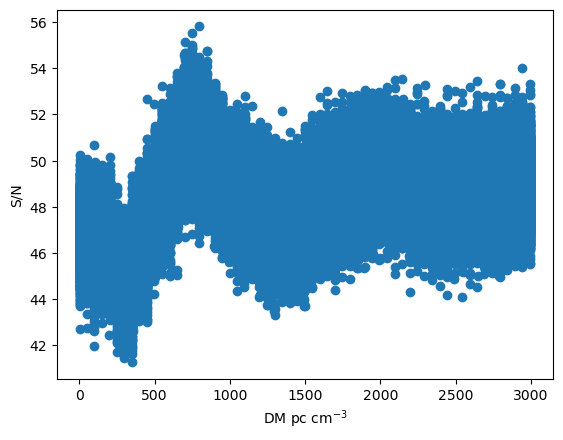

[]


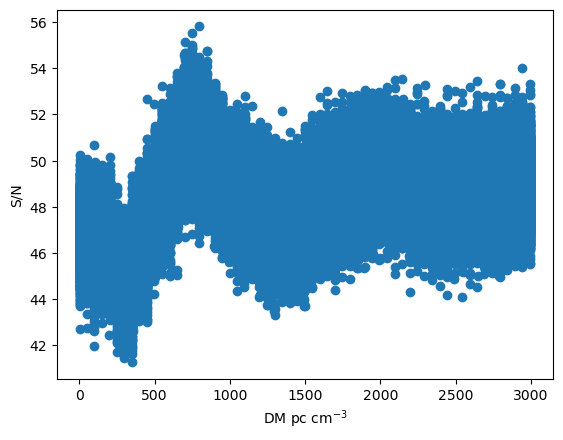

(67100, 16)


In [5]:
plt.scatter(fredda_result2.dm,fredda_result2.sn)
plt.xlabel("DM pc cm$^{-3}$")
plt.ylabel("S/N")

plt.show()

mask=(fredda_result2.dm>fredda_result2.real_dm+15)| (fredda_result2.dm<fredda_result2.real_dm-15) # | (fredda_result2.sn <30)
print(np.where(mask==True)[0])
fredda_filtered=fredda_result2.drop(np.where(mask==True)[0])
plt.scatter(fredda_filtered.dm,fredda_filtered.sn)
plt.xlabel("DM pc cm$^{-3}$")
plt.ylabel("S/N")
plt.show()

# np.sort(fredda_result2,axis=1)
print(fredda_filtered.shape)

In [13]:
key_params=fredda_filtered[["sn","width","real_dm","boxcar",'dm']].astype(float)
fredfin=key_params.groupby(["real_dm","width"]).mean()
fredfin_std=key_params.groupby(["real_dm","width"]).std() ### uncertainties
count=key_params.groupby(["real_dm","width"]).count()
print(np.unique(count.values)) ### check if data set cand number is right
# fredfin.xs(0,level=1) how to get cross section
# fredfin.xs(0,level=1)
print(fredfin)
print(fredfin_std)


width_index=fredfin.index.get_level_values(1).unique()
dmindex=fredfin.index.get_level_values(0).unique()
x,y=np.meshgrid(width_index,dmindex)
print(fredfin.sn.values.shape,x.shape)
z=fredfin.sn.values.reshape(x.shape)
z_std=fredfin_std.sn.values.reshape(x.shape)

boxcars=fredfin.boxcar.values.reshape(x.shape)
dmoffs=fredfin.dm.values.reshape(x.shape)-y
# plt.imshow(z_std,aspect='auto')

[50]
                    sn  boxcar         dm
real_dm width                            
0.0     0.5    45.3262    0.52     0.7100
        1.0    47.5012    2.00     0.7100
        1.5    47.5566    3.94     0.7100
        2.0    47.6398    4.90     0.7240
        2.5    47.5898    5.98     0.7240
...                ...     ...        ...
3000.0  9.0    48.3592   25.88  2992.3588
        9.5    48.1818   27.04  2992.3582
        10.0   48.2692   27.86  2992.4150
        10.5   48.2018   29.10  2992.0620
        11.0   47.8586   29.86  2992.1190

[1342 rows x 3 columns]
                     sn    boxcar        dm
real_dm width                              
0.0     0.5    1.034860  0.504672  0.000000
        1.0    1.184543  0.000000  0.000000
        1.5    1.072191  0.313636  0.000000
        2.0    0.984939  0.364216  0.098995
        2.5    0.859892  0.795138  0.098995
...                 ...       ...       ...
3000.0  9.0    0.990979  1.349830  1.450111
        9.5    1.071592  1.6

(61, 22)


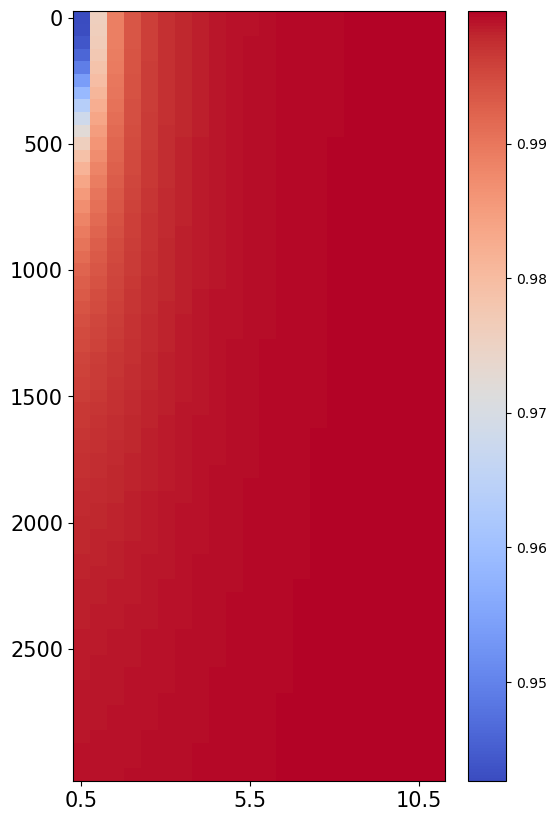

In [14]:
response=np.load("SN response matrix files/snr matchfilter response/hifreq_single_response.npy").T
plt.figure(figsize=(6,10))
print(response.shape)
plt.imshow(response,aspect='auto',cmap=cm.coolwarm,interpolation='nearest')
plt.xticks(np.arange(0,22,2*5),np.arange(0.5,11.1,1*5),fontsize=15)
plt.yticks(np.arange(0,60,10),np.arange(0,2950,500),fontsize=15)
plt.colorbar()
plt.show()


/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/636747311.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


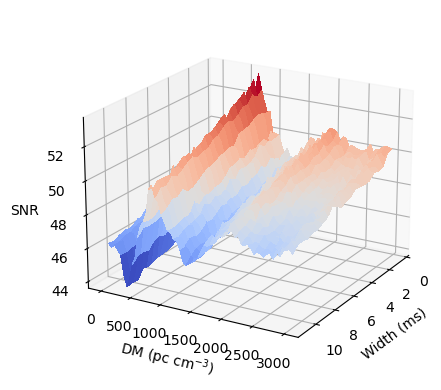

/var/folders/hn/q8xl50512td1d4kbh1z_cqd42px3pc/T/ipykernel_22086/636747311.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


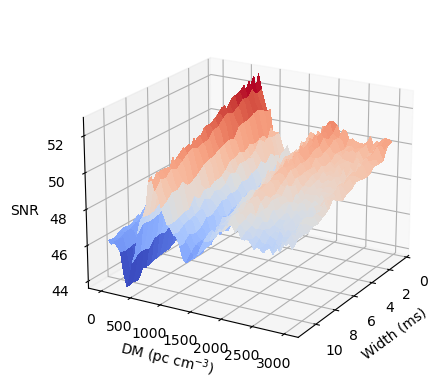

In [19]:

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z/response,cmap=cm.coolwarm,antialiased=False)
ax.azim=30
ax.elev=20
ax.set_xlabel("Width (ms)")
ax.set_ylabel("DM (pc cm$^{-3}$)")
ax.set_zlabel("SNR")

plt.show()
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z,cmap=cm.coolwarm,antialiased=False)
ax.azim=30
ax.elev=20
ax.set_xlabel("Width (ms)")
ax.set_ylabel("DM (pc cm$^{-3}$)")
ax.set_zlabel("SNR")

plt.show()

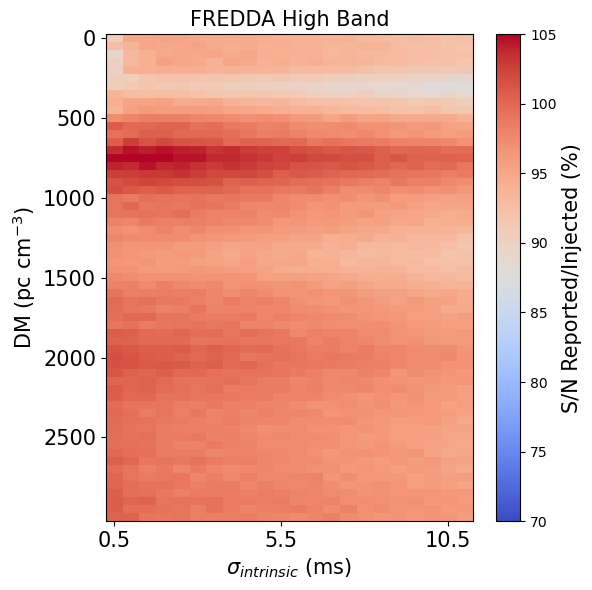

(61, 22) (1342,)


In [20]:
%matplotlib inline
norm=cm.colors.Normalize(vmax=abs(z*2*response).max(), vmin=abs(z*2*response).min())
norm=cm.colors.Normalize(vmax=105, vmin=70) ## for comparison with heimdall etc.

plt.figure(figsize=(6,6))
plt.imshow(z*2,aspect='auto',cmap=cm.coolwarm,interpolation='nearest',
           norm=norm)
# plt.contour(z*2*response,levels=np.arange(0,35,3),colors='black')


plt.xticks(np.arange(0,22,2*5),np.arange(0.5,11.1,1*5),fontsize=15)
plt.yticks(np.arange(0,60,10),np.arange(0,2950,500),fontsize=15)
cbar=plt.colorbar()
plt.title("FREDDA High Band",fontsize=15)
plt.xlabel("$\sigma_{intrinsic}$ (ms)",fontsize=15)
plt.ylabel("DM (pc cm$^{-3}$)",fontsize=15)
cbar.set_label("S/N Reported/Injected (%)",fontsize=15)
plt.tight_layout()

plt.show()
print(z.shape,z.flatten().shape)

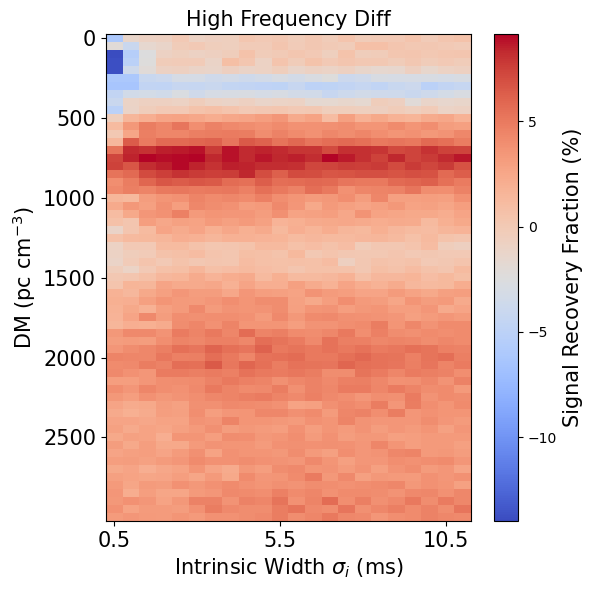

In [23]:

compare_response=np.load("SN response matrix files/FREDDA response map hifreq single 0dm.npy")
plt.figure(figsize=(6,6))
plt.imshow(z*2*response-compare_response,aspect='auto',cmap=cm.coolwarm,interpolation='nearest')
# plt.contour(z*2*response,levels=np.arange(0,35,3),colors='black')


plt.xticks(np.arange(0,22,2*5),np.arange(0.5,11.1,1*5),fontsize=15)
plt.yticks(np.arange(0,60,10),np.arange(0,2950,500),fontsize=15)
cbar=plt.colorbar()
plt.title("High Frequency Diff",fontsize=15)
plt.xlabel("Intrinsic Width $\sigma_i$ (ms)",fontsize=15)
plt.ylabel("DM (pc cm$^{-3}$)",fontsize=15)
cbar.set_label("Signal Recovery Fraction (%)",fontsize=15)
plt.tight_layout()
# plt.savefig("FREDDA response map hifreq single diff.png",dpi=300)
# plt.savefig("FREDDA response map hifreq single diff.pdf")
plt.show()

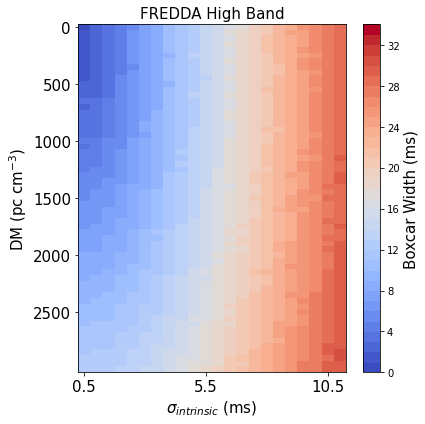

(61, 22) (1342,)


In [11]:
%matplotlib inline

cmap = cm.coolwarm  # define the colormap

# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
import matplotlib as mpl
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
norm = mpl.colors.BoundaryNorm(np.arange(0,35,1), cmap.N)


plt.figure(figsize=(6,6))
plt.imshow(boxcars,aspect='auto',cmap=cm.coolwarm,interpolation='nearest',
           norm=norm)
plt.xticks(np.arange(0,22,2*5),np.arange(0.5,11.1,1*5),fontsize=15)
plt.yticks(np.arange(0,60,10),np.arange(0,2950,500),fontsize=15)
cbar=plt.colorbar()
plt.title("FREDDA High Band",fontsize=15)
plt.xlabel("$\sigma_{intrinsic}$ (ms)",fontsize=15)
plt.ylabel("DM (pc cm$^{-3}$)",fontsize=15)
cbar.set_label("Boxcar Width (ms)",fontsize=15)
plt.tight_layout()
plt.savefig("FREDDA boxcar map hifreq single.png",dpi=300)

# plt.savefig("FREDDA boxcar map hifreq single.pdf")
plt.show()
print(z.shape,z.flatten().shape)

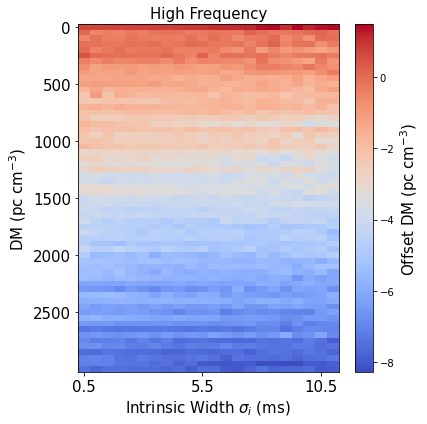

(61, 22) (1342,)


In [12]:
%matplotlib inline
norm=cm.colors.Normalize(vmax=(dmoffs).max(), vmin=(dmoffs).min())
plt.figure(figsize=(6,6))

plt.imshow(dmoffs,aspect='auto',cmap=cm.coolwarm,interpolation='nearest',
           norm=norm)
plt.xticks(np.arange(0,22,2*5),np.arange(0.5,11.1,1*5),fontsize=15)
plt.yticks(np.arange(0,60,10),np.arange(0,2950,500),fontsize=15)
cbar=plt.colorbar()
plt.title("High Frequency",fontsize=15)
plt.xlabel("Intrinsic Width $\sigma_i$ (ms)",fontsize=15)
plt.ylabel("DM (pc cm$^{-3}$)",fontsize=15)
cbar.set_label("Offset DM (pc cm$^{-3}$)",fontsize=15)
plt.tight_layout()
plt.savefig("FREDDA DM offset map hifreq single.png",dpi=300)

plt.savefig("FREDDA DM offset map hifreq single.pdf")
plt.show()
print(z.shape,z.flatten().shape)

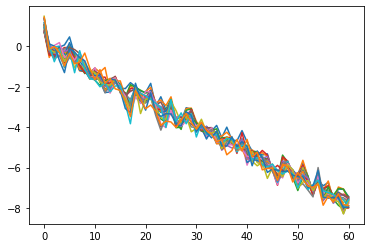

In [13]:
plt.plot(dmoffs)